
✅ Model Evaluation:
Accuracy: 0.8707200982650084

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.87      0.87      0.86      6513


Confusion Matrix:
 [[4699  243]
 [ 599  972]]


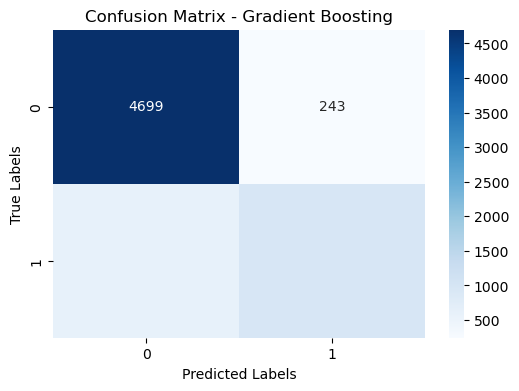

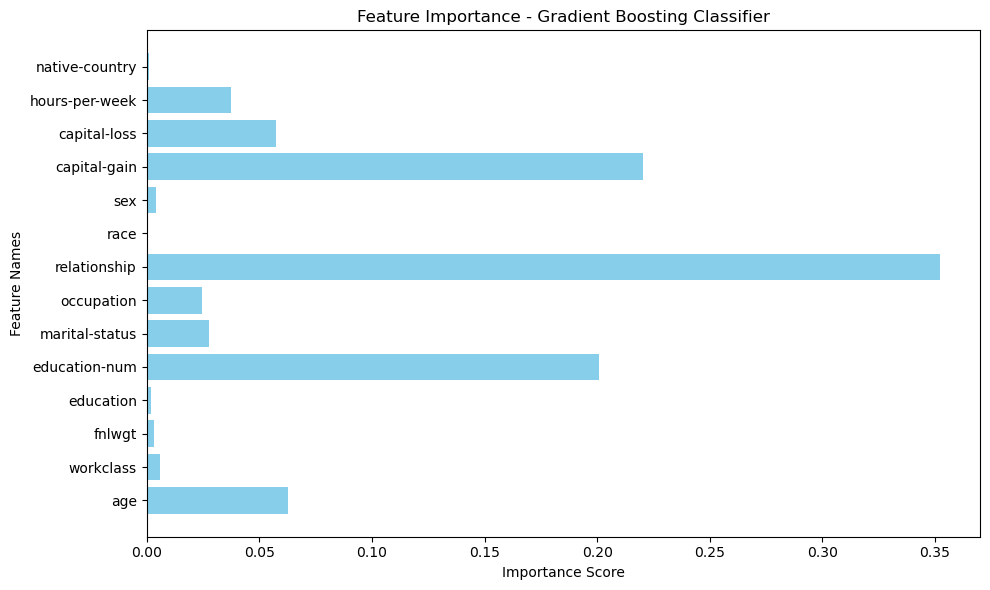

In [3]:
# ===============================================
# Title: Gradient Boosting Classifier
# Aim: To classify income using Gradient Boosting Algorithm
# ===============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = pd.read_csv("income_evaluation (1).csv")

# Step 2: Clean up column names (remove extra spaces)
data.columns = data.columns.str.strip()

# Step 3: Encode categorical features using LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Step 4: Separate features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

# Step 5: Split dataset into training and testing data (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model performance
print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Plot Feature Importance
plt.figure(figsize=(10,6))
importance = model.feature_importances_
plt.barh(X.columns, importance, color='skyblue')
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature Names")
plt.tight_layout()
plt.show()
